# Analytics of the ride-sharing company passenger patterns 

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Step 4. Exploratory data analysis (Python)

<div class="paragraph">In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:</div>
<div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv" target="blank">/datasets/project_sql_result_01.csv</a>. It contains the following data:</div>
<div class="paragraph"><em>company_name</em>: taxi company name</div>
<div class="paragraph"><em>trips_amount</em>: the number of rides for each taxi company on November 15-16, 2017.</div>
<div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv" target="blank">/datasets/project_sql_result_04.csv</a>. It contains the following data:</div>
<div class="paragraph"><em>dropoff_location_name</em>: Chicago neighborhoods where rides ended</div>
<div class="paragraph"><em>average_trips</em>: the average number of rides that ended in each neighborhood in November 2017.</div>
<div class="paragraph">For these two datasets you now need to</div>
<ul>
<li>import the files</li>
<li>study the data they contain</li>
<li>make sure the data types are correct</li>
<li>identify the top 10 neighborhoods in terms of drop-offs</li>
<li>make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs</li>
<li>draw conclusions based on each graph and explain the results</li>
</ul>

In [2]:
# imports
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import warnings

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy import stats as st

warnings.filterwarnings('ignore')
%matplotlib inline

# set pandas max column print
pd.set_option('display.max_columns', 50)

In [3]:
data1 = pd.read_csv('/datasets/project_sql_result_01.csv')
data2 = pd.read_csv('/datasets/project_sql_result_04.csv')

<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Thank you so much that you import all the necessary libraries at the top of your code. It is a good practice!
</div>

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
data1.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
data2.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
data1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [9]:
data2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## <font color='DarkTurquoise'>Reviewer's commentary: second review stage</font>
<code style="background:PaleTurquoise;color:black">**Ok, well done!**  
    **It is good that you show the code that is resulted from applying of describe function. But again, it would be better if you add some explanations about the results of describe() function! What does it mean that average_trips std (standard deviation) is 1714.59?How we can interpret the fact that 75% of trips_amount is 2106.5? You can find a great explanations of the summary statistics core elements <a href="https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32" title="TowardsDataScience">here**</a></code>


### Step 4. Exploratory data analysis - Conclusion

<p>Two Dataframes contains</p>
<p>Dataframes named <strong>Data1</strong>&nbsp;contains:</p>
<ul>
<li class="paragraph"><strong><em>company_name</em></strong>: taxi company name</li>
<li class="paragraph"><strong><em>trips_amount</em></strong>: the number of rides for each taxi company on November 15-16, 2017.</li>
</ul>
<div class="paragraph">&nbsp;</div>
<div class="paragraph">Dataframes named <strong>Data2</strong>&nbsp;contains:</div>
<div class="paragraph">
<ul>
<li class="paragraph"><strong><em>dropoff_location_name</em></strong>: Chicago neighborhoods where rides ended</li>
<li class="paragraph"><strong><em>average_trips</em></strong>: the average number of rides that ended in each neighborhood in November 2017.</li>
</ul>
</div>
<div class="paragraph">Data types and missing values for both dataframes are acceptable for the upcoming analysis and filters.</div>

<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> It is crucially important to provide every step you do with intermediate and overall conclusions. And it is also not very good practice to leave commented code cells. If you do this please provide your commented code with explanations about why you leave this piece of code under comment</div>

<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> Please, remember that it is better to show results of all your code cells execution and not to leave it commented. Results of describe() and head() methods are very significant because they can help us to understand our data better at the first step of descriptive analysis. And, again, pay attention to the conclusions and explanations of these functions results, it is better not to ignore it 😉</div>

<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> And what about data types? How do you think, if the data types we have are appropriate for further analysis? Please, be carefull about data types in your data analysis. Sometimes wrong data types can lead to mistakes in main results!</div>

<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> It is also important to check your data on missing values and think about not only how to preprocess missing values but the reasons of why missing values occur in data. Please, take this aspect in consideration in your every project at the step of data preprocessing!🙂</div>

## <font color='DarkTurquoise'>Reviewer's commentary: second review stage</font>
<code style="background:PaleTurquoise;color:black">**Ok, good job!**  
    **Great, that you add cpmmentary about missing values and what columns dataframes contain.**</code>

### Step 4: Identify the top 10 neighborhoods in terms of drop-offs

<div class="alert alert-block alert-warning">
<b>Tip!📌:</b> Your solution is correct but you can also use '.nlargest()' method here.
</div>

In [9]:
data2.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [12]:
data2.nlargest(10, 'average_trips')

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-danger">
<b>Needs fixing!🤔:And, again, the conclusion is missing here! How can you interpret the results you have got?</b> 
</div>

### Step 4: Identify the top 10 neighborhoods in terms of drop-offs - Conclusion

<p>The top 10 neighborhoods in terms of drop-offs were identified.<br />In the first place with 10727 average trips is Loop.<br />Full list of Top 10:</p>
<table class="dataframe" style="width: 362px;" border="1">
<thead>
<tr style="height: 43px;">
<th style="width: 157px; height: 43px;">
<p>Dropoff Location Name</p>
</th>
<th style="width: 189px; height: 43px;">Average Trips Number</th>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Loop</td>
<td style="width: 189px; height: 18px;">10727.466667</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">River North</td>
<td style="width: 189px; height: 18px;">9523.666667</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Streeterville</td>
<td style="width: 189px; height: 18px;">6664.666667</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">West Loop</td>
<td style="width: 189px; height: 18px;">5163.666667</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">O'Hare</td>
<td style="width: 189px; height: 18px;">2546.900000</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Lake View</td>
<td style="width: 189px; height: 18px;">2420.966667</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Grant Park</td>
<td style="width: 189px; height: 18px;">2068.533333</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Museum Campus</td>
<td style="width: 189px; height: 18px;">1510.000000</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Gold Coast</td>
<td style="width: 189px; height: 18px;">1364.233333</td>
</tr>
<tr style="height: 18px;">
<td style="width: 157px; height: 18px;">Sheffield &amp; DePaul</td>
<td style="width: 189px; height: 18px;">1259.766667</td>
</tr>
</tbody>
</table>

Note: Per the reviewer tip the nlargest function used, it has shorter code and found useful

## <font color='DarkTurquoise'>Reviewer's commentary: second review stage</font>
<code style="background:PaleTurquoise;color:black">**Great results!**</code>

### Step 4: Make graphs

<ul>
<li>Taxi companies and the number of rides</li>
<li>Top 10 neighborhoods by number of dropoffs</li>
</ul>

In [11]:
df1 = data1.sort_values(by='trips_amount', ascending=False).head(10)

<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> One of the graph you have built is commented on. Why is it so? It is important to provide explanations about it!☝</div>

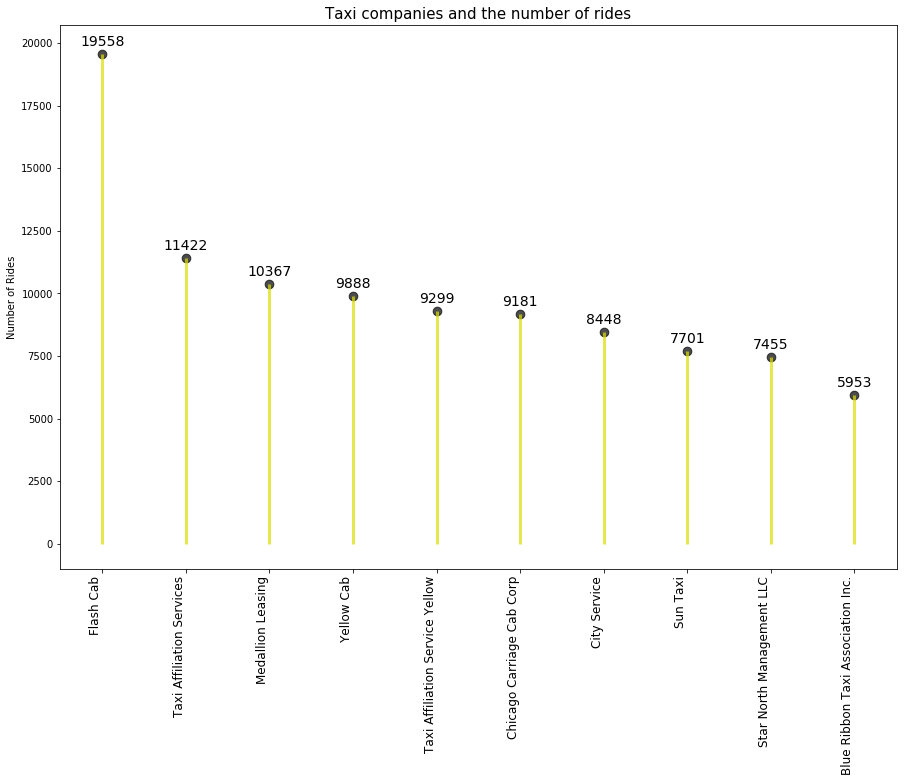

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
ax.vlines(x=df1.company_name,ymin=0,ymax=df1.trips_amount,color='#DCDC04',alpha=0.7, linewidth=3)
ax.scatter(x=df1.company_name,y=df1.trips_amount,s=75,color='black', alpha=0.7)

ax.set_title('Taxi companies and the number of rides', fontdict = {'size':15})
ax.set_ylabel('Number of Rides')
ax.set_xticks(df1.index)
ax.set_xticklabels(df1.company_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})

for row in df1.itertuples():
    ax.text(row.Index, row.trips_amount+200, s=round(row.trips_amount, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

### Step 4: Taxi companies and the number of rides - Conclusion

After exploring the received data frames and transformed it into a clear and readable graph we can see clearly see that the most popular cap company is "Flash Cap".

In [13]:
df2 = data2.sort_values(by='average_trips', ascending=False).head(10)

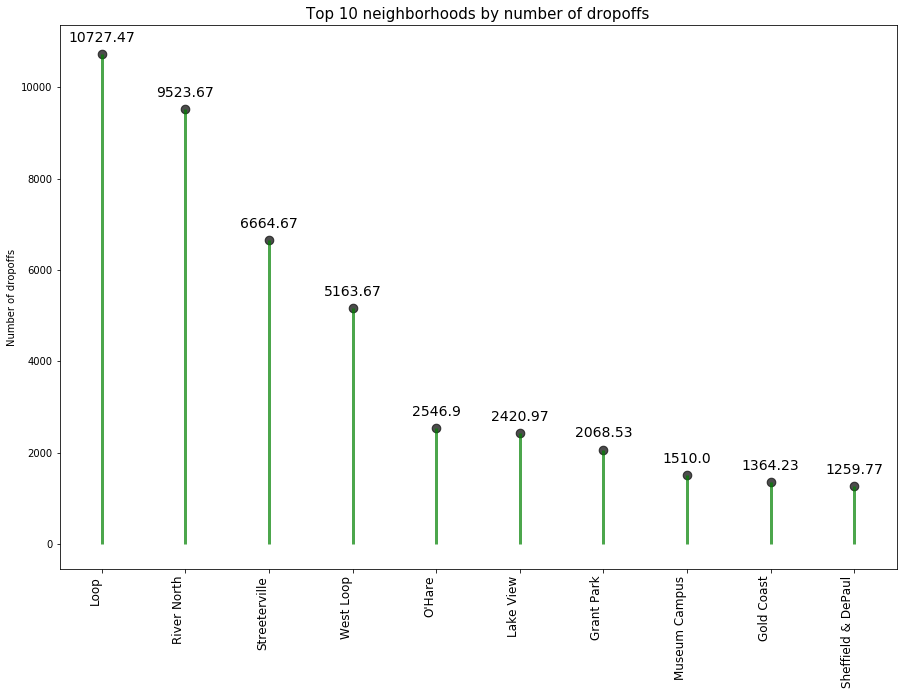

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
ax.vlines(x=df2.dropoff_location_name,ymin=0,ymax=df2.average_trips,color='green',alpha=0.7, linewidth=3)
ax.scatter(x=df2.dropoff_location_name,y=df2.average_trips,s=75,color='black', alpha=0.7)

ax.set_title('Top 10 neighborhoods by number of dropoffs', fontdict = {'size':15})
ax.set_ylabel('Number of dropoffs')
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.dropoff_location_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})

for row in df2.itertuples():
    ax.text(row.Index, row.average_trips+200, s=round(row.average_trips, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

### Step 4: Top 10 neighborhoods by number of dropoffs - Conclusion

After exploring the received data frames and transformed it into a clear and readable graph we can see clearly see that the most popular drtopoff places is "Loop" and "River North".

<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Your graphs look very nice and informative. Thank you so much for adding axis labels and plot title. It is a good practice in designing plots!
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing!🤔:</b> It is extremely important to explain the results you gain from your plots, describe their characteristics and formulate conclusions from the picture you get. Please, pay attention to this aspect next times!
</div>

## <font color='DarkTurquoise'>Reviewer's commentary: second review stage</font>
<code style="background:PaleTurquoise;color:black">**Conclusions based on plots are very important! Thank you so much for describing your plots' insights!**</code>

### Step 5. Testing hypotheses (Python)

<div class="paragraph">
<div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv" target="blank">/datasets/project_sql_result_07.csv</a>&nbsp;&mdash; the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:</div>
<ul>
<li><em>start_ts</em>
<ul>
<li>pickup date and time</li>
</ul>
</li>
<li><em>weather_conditions</em>
<ul>
<li>weather conditions at the moment the ride started</li>
</ul>
</li>
<li><em>duration_seconds</em>
<ul>
<li>ride duration in seconds</li>
</ul>
</li>
</ul>
<div class="paragraph">Test the hypothesis:</div>
<div class="paragraph">"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."</div>
<div class="paragraph">Decide where to set the significance level (alpha) on your own.</div>
<div class="paragraph">Explain:</div>
<ul>
<li>how you formed the null and alternative hypotheses</li>
<li>what criterion you used to test the hypotheses and why</li>
</ul>
</div>

In [10]:
data3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
data3.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [30]:
data3['duration_seconds'] = data3['duration_seconds'].astype(int)
data3['Day'] = pd.to_datetime(data3['start_ts']).dt.dayofweek
data3.info()
data3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int64
Day                   1068 non-null int64
dtypes: int64(2), object(2)
memory usage: 33.5+ KB


,start_ts,weather_conditions,duration_seconds,Day
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5
5,2017-11-11 04:00:00,Good,1320,5
6,2017-11-04 16:00:00,Bad,2969,5
7,2017-11-18 11:00:00,Good,2280,5
8,2017-11-11 14:00:00,Good,2460,5
9,2017-11-11 12:00:00,Good,2040,5


In [31]:
data3.groupby('Day')['Day'].count()

,start_ts,weather_conditions,duration_seconds
Day,,,
5,1068,1068,1068


In [ ]:
data3.weather_conditions.value_counts()

In [34]:
good_weather = data3.query('weather_conditions == "Good"')
print(good_weather.weather_conditions.value_counts())

bad_weather = data3.query('weather_conditions == "Bad"')
bad_weather.info()
print(bad_weather.weather_conditions.value_counts())

Good    888
Name: weather_conditions, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
start_ts              180 non-null object
weather_conditions    180 non-null object
duration_seconds      180 non-null int64
Day                   180 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.0+ KB
Bad    180
Name: weather_conditions, dtype: int64


<div class="alert alert-block alert-info">
<b>Let's think about it...💡: </b> it is not very good to leave commented code cells without explanations as well as leave yet another analysis step without conclusion. Keep it in mind!</div>

In [35]:
# Hypothesis on the Equality of Two Population Means

good_weather_duration_seconds = bad_weather['duration_seconds']
bad_weather_duration_seconds = good_weather['duration_seconds']
 
alpha = 0.05

results = st.ttest_ind(good_weather_duration_seconds, bad_weather_duration_seconds)
 
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


### Step 5: Testing hypotheses - Conclusion

Test the hypothesis:
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

hypothesis tested by "Equality of Two Population Means" method.

P-value for the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

P-value for rides in good weather and in rainy weather is bigger than Alpha so null hypothesis rejected.

<div class="alert alert-block alert-danger">
<b>Needs fixing!🤔:</b> What hypothesis you have tested? How can you formulate the null and alternative hypothesis? It is very important to clearly formulate the null and alternative hypothesis! Please, take it into consideration in your future analysis!
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing!🤔:</b> What statistical criterion have you chosen for testing the hypothesis? Why have you chosen this criterion and have not chosen another? It is better to explain what statistical criterion you choose for testing your hypothesis and why. And, again, results you get from hypothesis testing also important to comment on and make overall conclusions.
</div>

## <font color='DarkTurquoise'>Reviewer's commentary: second review stage</font>
<code style="background:PaleTurquoise;color:black">**I really like to see your progress!**  
    **I would like to recommend you one extremely useful links that help you in your future projects an work: <a href="https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/" title="p-value">here</a> you can find very good eplanation of p-value and <a href="https://www.notion.so/Useful-links-and-materials-for-the-projects-0ca5f385a2a54a54a29d190489d46e7f#016d3f167aea436cae436bf6d4df78d9" title="null hypothesis">this link</a> help you to understand the formulation of null and alternative hypothesis much better!**</code>

### Review conclusions

Dmitry, thank you for submitting your project! I can see that you've worked really hard on it! But, unfortunately, your project is not quite ready for accepting on the basis of review results. You have not provided all your steps and intermediate tasks with explanations and conclusions, despite the fact that in general you apply methods and functions correctly. Here in Yandex.Praktikum we try to show that data analysis it is not only about numbers, calculations, tables and beautiful graphs, but also about deep understanding of the results we gain, the skill of explanations and making conclusions based on our analysis. It is extremely important to adhere to the rules of project design and formatting. Please, keep it in mind!🙂

You've already done a lot, there's just a little more left to do! I'm sure you'll fix the rest of it easily!

P.S. if you have difficulties in understanding of how to properly format a project, please contact your tutor, he or she can provide you with manual and other materials for project formatting!

<p><span style="color: #0000ff;"><strong>Hello Ariana,</strong></span><br /><span style="color: #0000ff;"><strong>Thank you very much for your review and spent time,</strong></span><br /><span style="color: #0000ff;"><strong>It is the first version of the project, and it always comes without conclusions. I want to verify that I wrote code correctly.</strong></span></p>
<p><strong><span style="color: #0000ff;">From your notes, I can understand that all my code is right and I added conclusions per your request, so my project must be ready to final approval.</span></strong></p>

### <font color='orange'>Review conclusion: second review stage</font>
Dmitry, thank you for submitting your project for the second stage of review! I really appreciate the corrections you sent in and I can see your progress! Your project has been accepted and now you can move on to the next sprint. Please pay more attention to explanations of your analysis result, try to provide such explanations and conclusions on each step and each code cell of your project. It is really important for your development as great analyst! Good luck!

### Task checklist
- [x] All files were opened
- [x] The files were studied (the first rows printed, info() method used)
- [x] The student identified missing values
- [x] The slices of data were made correctly
- [x] The data was grouped correctly
- [x] The data was converted to necessary types
- [x] Data preprocessing was done
- [x] Hypotheses were formulated correctly
- [ ] Student explain what criterion she used and why
- [x] The student tested the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
- [x] There are explanations to hypothesis testing: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
- [ ] There are conclusions and comments at each stage
- [ ] There’s an overall conclusion